In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [260]:
!unzip "/content/archive (4).zip" -d "loan"

Archive:  /content/archive (4).zip
replace loan/train_u6lujuX_CVtuZ9i (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [261]:
df=pd.read_csv("/content/loan/loan.csv")

In [262]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [264]:
na=df.isna().sum()
na

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [265]:
df["Gender"].dtype=="O"

True

In [266]:
df=df.drop(columns=["Loan_ID"])

In [267]:
for column in df.columns:
  if na[column]!=0:
    if df[column].dtype=="O":
      for i in df[df[column].isna()].itertuples():
        df.loc[i.Index,column]=df[df["Loan_Status"]==i.Loan_Status][column].value_counts().sort_values(ascending=False).index[0]
    else :
      for i in df[df[column].isna()].itertuples():
         df.loc[i.Index,column]=df[df["Loan_Status"]==i.Loan_Status][column].mean()



In [268]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [269]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,144.294404,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [270]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


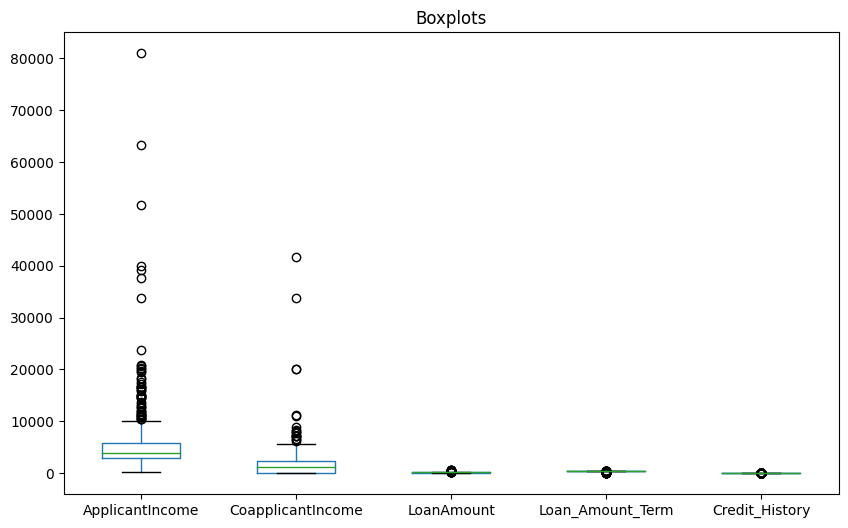

In [271]:
plt.figure(figsize=[10,6])
plt.title("Boxplots")
df.boxplot()
plt.grid(False)
plt.show()

In [272]:
for column in ["ApplicantIncome","CoapplicantIncome"]:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bondries=q1-(iqr*1.5)
  upper_bondries=q3+(iqr*1.5)
  df[column]=df[column].apply(lambda x: lower_bondries if x < lower_bondries else (upper_bondries if x > upper_bondries else x))

In [273]:
x,y=df.iloc[:,:-1],df.iloc[:,-1]

In [274]:
categorical_f=x.select_dtypes(include=["O"])

In [275]:
OHE=OneHotEncoder(sparse=False,drop="first")

In [276]:
categorical_encoded=OHE.fit_transform(categorical_f)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [277]:
categorical_f

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [278]:
# categorical_f["Property_Area"].unique()

In [279]:
cat_ohe=pd.DataFrame(categorical_encoded,columns=OHE.get_feature_names_out(categorical_f.columns))

In [280]:
cat_ohe

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [281]:
x=x.drop(columns=categorical_f.columns,axis=1)

In [282]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [283]:
scaled_data=pd.DataFrame(scaled_data,columns=scaler.get_feature_names_out(x.columns))
scaled_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.497164,-0.874587,-0.025794,0.279723,0.440239
1,-0.013767,0.054395,-0.219840,0.279723,0.440239
2,-0.652632,-0.874587,-0.958182,0.279723,0.440239
3,-0.820924,0.578025,-0.315110,0.279723,0.440239
4,0.558104,-0.874587,-0.065026,0.279723,0.440239
...,...,...,...,...,...
609,-0.692990,-0.874587,-0.898638,0.279723,0.440239
610,-0.206274,-0.874587,-1.267809,-2.518765,0.440239
611,1.394319,-0.726739,1.268753,0.279723,0.440239
612,1.196969,-0.874587,0.482776,0.279723,0.440239


In [284]:
merged_df=pd.concat([scaled_data,cat_ohe],axis=1)

In [285]:
merged_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.497164,-0.874587,-0.025794,0.279723,0.440239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.013767,0.054395,-0.219840,0.279723,0.440239,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.652632,-0.874587,-0.958182,0.279723,0.440239,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.820924,0.578025,-0.315110,0.279723,0.440239,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.558104,-0.874587,-0.065026,0.279723,0.440239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.692990,-0.874587,-0.898638,0.279723,0.440239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,-0.206274,-0.874587,-1.267809,-2.518765,0.440239,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,1.394319,-0.726739,1.268753,0.279723,0.440239,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,1.196969,-0.874587,0.482776,0.279723,0.440239,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [286]:
encoder= LabelEncoder()
label=encoder.fit_transform(y)

In [287]:
label=pd.Series(label,name="label")

In [288]:
label

,label
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [305]:
x_train,x_test,y_train,y_test=train_test_split(merged_df,label,test_size=0.1,random_state=42,shuffle=True)

In [306]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
550,0.813570,-0.874587,0.056693,0.279723,-2.386408,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
439,1.018991,-0.874587,-0.100752,0.279723,0.440239,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
394,-0.612274,-0.012137,-0.398471,0.279723,0.440239,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
382,0.558104,-0.874587,0.113605,0.279723,0.440239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,-0.349948,0.408615,-0.315110,0.279723,0.440239,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.106658,0.280480,-0.589011,0.279723,0.440239,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
106,2.241532,-0.180931,0.935308,0.279723,0.440239,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
270,-0.556984,-0.874587,-1.386896,0.279723,0.440239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
435,2.191387,-0.874587,-0.025794,-1.585935,0.440239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [307]:
classifier=svm.SVC(kernel='linear')

In [308]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [309]:
train_pred=classifier.predict(x_train)

In [310]:
accuracy_score(y_train,train_pred)

0.8152173913043478

In [311]:
test_pred=classifier.predict(x_test)

In [312]:
accuracy_score(y_test,test_pred)

0.7580645161290323